# Viewing neuroimaging data with Python

In this tutorial we will learn how to load and plot neuroimaging data in Python

# Nibabel

Neuroimaging data is often stored in the format of nifti files `.nii` which can also be compressed using gzip `.nii.gz`.  These files store both 3D and 4D data and also contain structured metadata in the image **header**.

There is an very nice tool to access nifti data stored on your file system in python called [nibabel](http://nipy.org/nibabel/).  If you don't already have nibabel installed on your computer it is easy via `pip`. First, tell the jupyter cell that you would like to access the unix system outside of the notebook and then install nibabel using pip. You only need to run this once (unless you would like to update the version).

In [219]:
!pip install nibabel

You are using pip version 19.0.3, however version 20.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


nibabel objects can be initialized by simply pointing to a nifti file even if it is compressed through gzip.  First, we will import the nibabel module as `nib` (short and sweet so that we don't have to type so much when using the tool).

In [221]:
import os
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import nibabel as nib

In [222]:
data = nib.load('./brain.nii.gz')

In [223]:
data.get_fdata().shape

(192, 256, 256)

If we want to get more help on how to work with the nibabel data object we can either consult the [documentation](https://nipy.org/nibabel/tutorials.html#tutorials) or add a `?`.

In [224]:
data?

The imaging data is stored in either a 3D or 4D numpy array. Just like numpy, it is easy to get the dimensions of the data using `shape`

In [225]:
data.shape

(192, 256, 256)

# Using matplotlib
We can also directly access the data and plot a single slice using standard matplotlib functions.

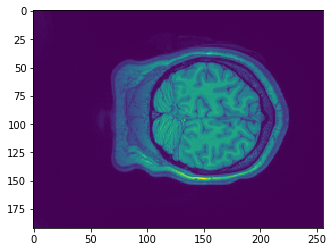

In [226]:
plt.imshow(data.get_fdata()[:,50,:])

Let's try a different slice.

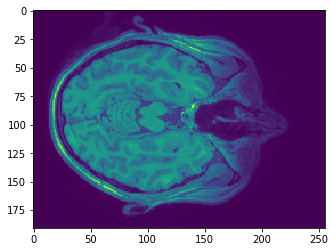

In [227]:
plt.imshow(data.get_fdata()[1:300,0:260,140])
#plt.imshow(data.get_fdata()[95,:,:])

Why is it it doesn't look like a brain at all? What do you think it is showing?


Try slicing different dimensions (x,y,z) yourself to get a feel for how the data is represented in this anatomical image.

# Mask

As you probably already notice, many of slices do not show brain at all! There are several techniques to determine whether a voxel belongs to the brain part or not. Using those techniques, we can obtain a mask, which is simply a 3D-array of 0's and 1's, where 1 tells you that that location is brain and 0 tells you the otherwise. 

One way to use the mask is to superimprose it on a brain image to add highlights only the brain part that we care about.

Let's load a pre-computed mask image.

In [228]:
mask = nib.load('./mask.nii.gz')

Using matplotlib's imshow, we can superimpose the mask as a semi-transparent layer to highlight the brain.

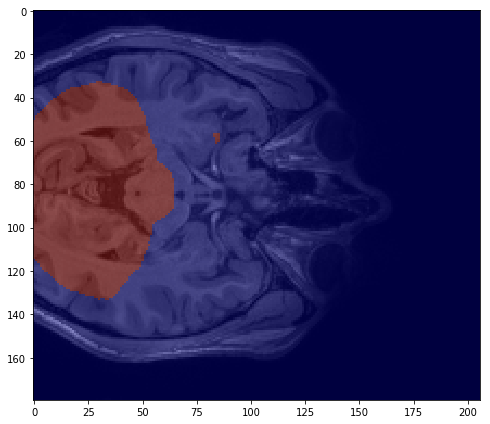

In [229]:
plt.figure(figsize=(8, 8))
plt.imshow(data.get_fdata()[10:190,50:,150], 'gray', interpolation='none')
plt.imshow(mask.get_fdata()[10:190,50:,120], 'jet', alpha=0.5, interpolation='none')
plt.show()

Try slicing different dimensions (x,y,z) yourself to get a feel for how the data is represented in this anatomical image.

# Exercises

## Visualize slices across an axis

The function below contains skeleton code that is hardcoded to show 10 slices of brain images across the x axis, 5 slices apart.
 
TODO: Implement the following functionalities
* handle axis = 'y' or 'z', and anywhere from 1 to 30 slices. (/)
* handle numbOfSlices from 1 to 20 (numbOfSlices should be the total number of images output) (/)
* handle steps (steps is the space between images) (/)
* show the value on the plot, e.g., adding a label x=20 on the slice where x=20 (/)

In [230]:
# TODO:
def ShowSlicesAcrossAxis(data, axis, numbOfSlices, steps):
    if axis == 'x':
        plt.figure(figsize=(20, 20))
        for i in range(1, numbOfSlices+1):
            plt.subplot(1,numbOfSlices,i)
            plt.imshow(data.get_fdata()[i*steps,:,:], 'gray', interpolation='none')
            plt.text(10, 240, 'x={}'.format(i*steps), fontsize=12, color='white')
        plt.show()
        
    if axis == 'y':
        plt.figure(figsize=(20, 20))
        for i in range(1, numbOfSlices+1):
            plt.subplot(1,numbOfSlices,i)
            plt.imshow(data.get_fdata()[:,i*steps,:], 'gray', interpolation='none')
            plt.text(10, 180, 'y={}'.format(i*steps), fontsize=12, color='white')
        plt.show()
        
    if axis == 'z':
        plt.figure(figsize=(20, 20))
        for i in range(1, numbOfSlices+1):
            plt.subplot(1,numbOfSlices,i)
            plt.imshow(data.get_fdata()[:,:,i*steps], 'gray', interpolation='none')
            plt.text(10, 180, 'z={}'.format(i*steps), fontsize=12, color='white')
        plt.show()

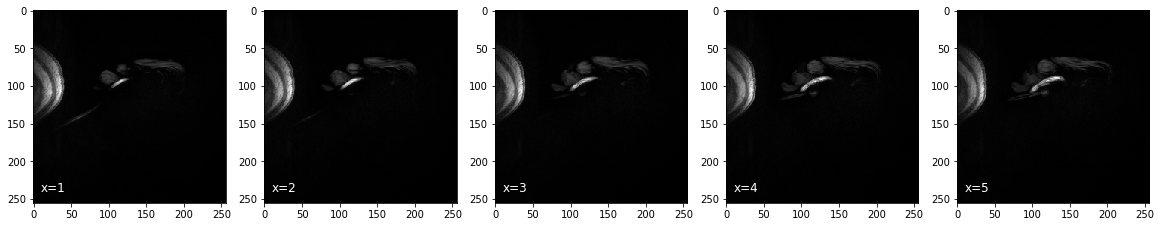

In [231]:
ShowSlicesAcrossAxis(data, 'x', 5, 1)

### Test case 1

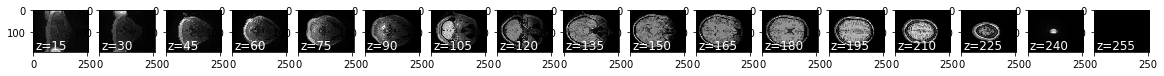

In [232]:
# this should show 17 brain slices along the z-axis that are 15 slices apart
ShowSlicesAcrossAxis(data, 'z', 17, 15)

### Test case 2

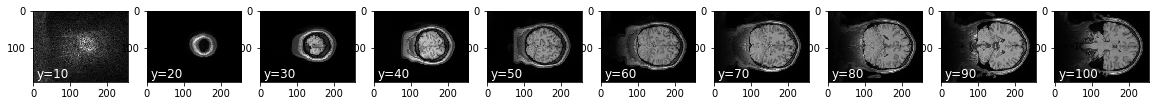

In [233]:
# this should show ten brain slices along the y-axis that are 10 slices apart
ShowSlicesAcrossAxis(data, 'y', 10, 10)

## Visualize at the (x,y,z) location

A typical way to visualize a location is:

![xyz](./xyz.png)

Your task is to improve this code so that it can generate a visualization like above. The code below provides a partial implemention. 

At very least, you will need to add the following functionalities:
* interpret x, y, z relative to the center of the data (e.g., x=1 -> x=-25 if there are 50 slices along x) (/)
* add labels showing the values of x, y, z (/)
* add crosses
* check for boundaries (/)

In [234]:
def indexToDistFromCenter(index, lengthOfAxis):
    if ((index < 0) or (index >= lengthOfAxis)):  # check for boundaries
        raise Exception('The requested value ({}) exceeded the boundary'.format(index))
    else:
        center = round(lengthOfAxis/2)
        distFromCenter = index - center
        return distFromCenter
        
def distFromCenterToIndex(distFromCenter, lengthOfAxis):
    center = round(lengthOfAxis/2)
    index = center + distFromCenter
    if ((index < 0) or (index >= lengthOfAxis)):  # check for boundaries
        raise Exception('The requested value ({}) exceeded the boundary'.format(distFromCenter))
    else:
        return index

# x, y, and z are input relative to the center (i.e. not the values you'd use to index into the data)
def ShowLocation(data, x, y, z):
    shape = data.get_fdata().shape
    xLength = shape[0]
    yLength = shape[1]
    zLength = shape[2]
    
    xIndex = distFromCenterToIndex(x,xLength) 
    yIndex = distFromCenterToIndex(y,yLength)
    zIndex = distFromCenterToIndex(z,zLength)
    
    plt.figure(figsize=(10,10))
    
    plt.subplot(1,3,1, xlabel='Z', ylabel='Y')  
    plt.imshow(data.get_fdata()[xIndex,:,:], 'gray', interpolation='none')
    plt.plot([zIndex,zIndex],[0,yLength],'w-', linestyle = "-", lw=2)
    plt.plot([0,zLength],[yIndex,yIndex],'w-', linestyle = "-", lw=2)
    plt.text(10, 245, 'x={}'.format(x), fontsize=12, color='white')
    
    plt.subplot(1,3,2, xlabel='Z', ylabel='X')
    plt.imshow(data.get_fdata()[:,yIndex,:], 'gray', interpolation='none')
    plt.plot([zIndex,zIndex],[0,xLength],'w-', linestyle = "-", lw=2)
    plt.plot([0,zLength],[xIndex,xIndex],'w-', linestyle = "-", lw=2)
    plt.text(10, 175, 'y={}'.format(y), fontsize=12, color='white')
    
    plt.subplot(1,3,3, xlabel='Y', ylabel='X')
    plt.imshow(data.get_fdata()[:,:,zIndex], 'gray', interpolation='none')
    plt.plot([yIndex,yIndex],[0,xLength],'w-', linestyle = "-", lw=2)
    plt.plot([0,yLength],[xIndex,xIndex],'w-', linestyle = "-", lw=2)
    plt.text(10, 175, 'z={}'.format(z), fontsize=12, color='white')
    
    plt.show()

### Test case 1

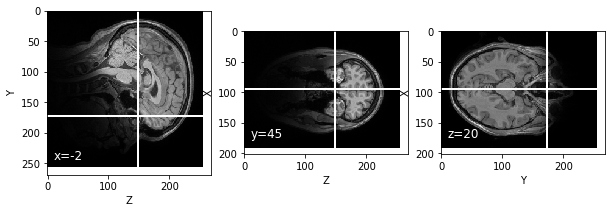

In [235]:
ShowLocation(data, -2, 45, 20)

### Test case 2

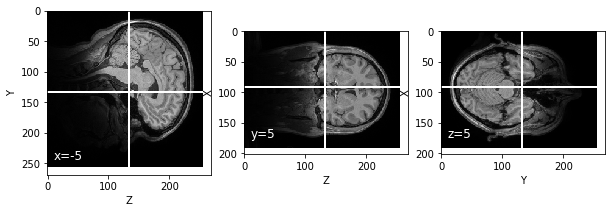

In [236]:
ShowLocation(data, -5, 5, 5)

## Visualize with a mask 

Improve your implementation of ShowLocation to also take a mask to highlight the brain.

In [237]:
def indexToDistFromCenter(index, lengthOfAxis):
    if ((index < 0) or (index >= lengthOfAxis)):  # check for boundaries
        raise Exception('The requested value ({}) exceeded the boundary'.format(index))
    else:
        center = round(lengthOfAxis/2)
        distFromCenter = index - center
        return distFromCenter
        
def distFromCenterToIndex(distFromCenter, lengthOfAxis):
    center = round(lengthOfAxis/2)
    index = center + distFromCenter
    if ((index < 0) or (index >= lengthOfAxis)):  # check for boundaries
        raise Exception('The requested value ({}) exceeded the boundary'.format(distFromCenter))
    else:
        return index


def ShowLocationWithMask(data, x, y, z, mask):
    shape = data.get_fdata().shape
    xLength = shape[0]
    yLength = shape[1]
    zLength = shape[2]
    
    xIndex = distFromCenterToIndex(x,xLength) 
    yIndex = distFromCenterToIndex(y,yLength)
    zIndex = distFromCenterToIndex(z,zLength)
    
    plt.figure(figsize=(10,10))
    
    plt.subplot(1,3,1, xlabel='Z', ylabel='Y')  
    plt.imshow(data.get_fdata()[xIndex,:,:], 'gray', interpolation='none')
    plt.imshow(mask.get_fdata()[xIndex,:,:], 'jet', alpha=0.5, interpolation='none')
    plt.plot([zIndex,zIndex],[0,yLength],'w-', linestyle = "-", lw=2)
    plt.plot([0,zLength],[yIndex,yIndex],'w-', linestyle = "-", lw=2)
    plt.text(10, 245, 'x={}'.format(x), fontsize=12, color='white')
    
    plt.subplot(1,3,2, xlabel='Z', ylabel='X')
    plt.imshow(data.get_fdata()[:,yIndex,:], 'gray', interpolation='none')
    plt.imshow(mask.get_fdata()[:,yIndex,:], 'jet', alpha=0.5, interpolation='none')
    plt.plot([zIndex,zIndex],[0,xLength],'w-', linestyle = "-", lw=2)
    plt.plot([0,zLength],[xIndex,xIndex],'w-', linestyle = "-", lw=2)
    plt.text(10, 175, 'y={}'.format(y), fontsize=12, color='white')
    
    plt.subplot(1,3,3, xlabel='Y', ylabel='X')
    plt.imshow(data.get_fdata()[:,:,zIndex], 'gray', interpolation='none')
    plt.imshow(mask.get_fdata()[:,:,zIndex], 'jet', alpha=0.5, interpolation='none')
    plt.plot([yIndex,yIndex],[0,xLength],'w-', linestyle = "-", lw=2)
    plt.plot([0,yLength],[xIndex,xIndex],'w-', linestyle = "-", lw=2)
    plt.text(10, 175, 'z={}'.format(z), fontsize=12, color='white')
    
    plt.show()

### Test Case 1

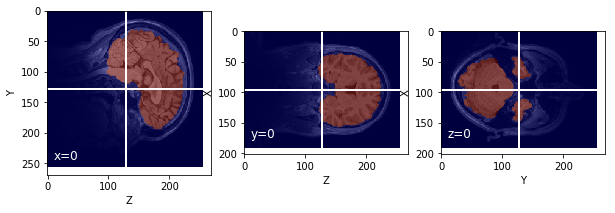

In [238]:
ShowLocationWithMask(data, 0, 0, 0, mask)

### Test Case 2

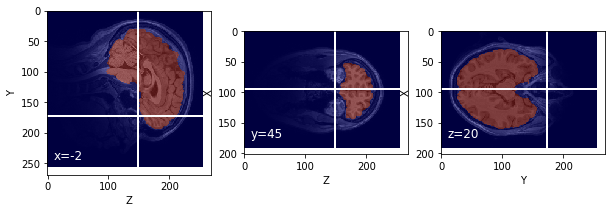

In [239]:
ShowLocationWithMask(data, -2, 45, 20, mask)